During this tutorial, we're going to analyze data with NumPy, Pandas, and MatPlotLib modules

Import all necessary modules - numpy, pandas, and matplotlib.pyplot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read csv file, check shape and dtypes. Define your target column.

In [2]:
filepath = '../data/House Price Train.csv'
df = pd.read_csv(filepath)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

We will use only numerical data now. For this, we should get sub-dataframe containing only float64 or int64. Use select_dtypes function

In [5]:
num_df = df.select_dtypes([np.int64, np.float64])

Check NaN values inside a new dataframe

In [6]:
num_df.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

Analyze correlations of all columns with target column. Sort their values in descending order so that you can see the highest correlations at the top.

In [7]:
num_df.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Usually, 1.0 correlation belongs to target column itself. So, we can ignore this. After sorting, you will see that OverallQual (Overall Quality) comes as second at 0.79. Let's analyze it! Use unique() function to make sure if this column is categorical. Probably, you will see values from 1 to 10, proving that there are classified values in the column.

In [8]:
num_df['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

Now, you need to group your data by means of OverallQual. Use groupby() function. After groupping, select your target column - SalePrice and use mean() function to get all means of prices for each quality value.

In [9]:
groupped_ovrqual = num_df.groupby('OverallQual')
groupped_ovrqual['SalePrice'].mean()

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

However, it is harder to understand what kind of patterns occur, just by looking at dataframe. That's the time when you are supposed to use MatPlotLib module. Bar chart is a better option for visualization of those means. Get index and values from  dataframe groupped by means of SalePrice and input them to bar() function. Do not forget to save the figure into your computer by defining colors, label and title names etc.

<BarContainer object of 10 artists>

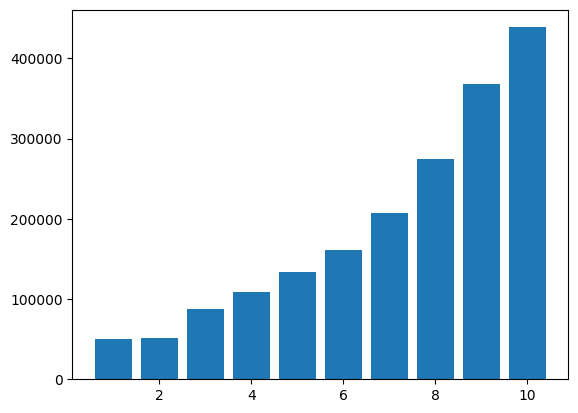

In [10]:
fig, ax= plt.subplots()
groupped_means = groupped_ovrqual['SalePrice'].mean()

quality = groupped_means.index
means = groupped_means.values

ax.bar(quality, means)

So, the question is what you understand from this chart? 

Going back to correlations, we can also see that GrLivArea - Grade Living Area has high relationships with SalePrice. Let's make a scatter plot to see the patterns

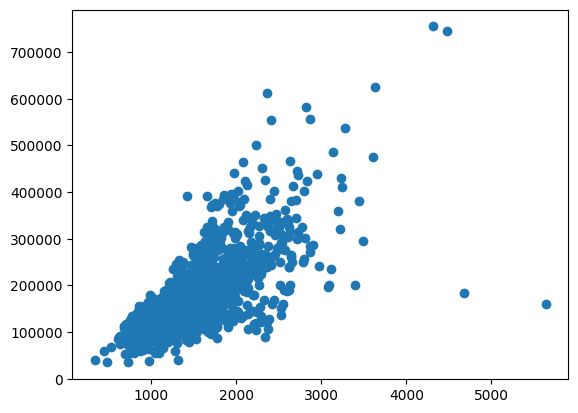

In [11]:
fig, ax = plt.subplots()

ax.scatter(num_df['GrLivArea'], num_df['SalePrice'])

Can you describe what you see? Data is densed somewhere, however, there are some data points away from that distribution. Why?

In [12]:
## Outliers

To make the previous question clearer for you, plot a box chart and let us know what is your next move based on your conclusion. Try to understand similarity between this chart and scatter plot. 

{'whiskers': [<matplotlib.lines.Line2D at 0x2aab0cc6110>,
 'caps': [<matplotlib.lines.Line2D at 0x2aab0cc6650>,
 'boxes': [<matplotlib.lines.Line2D at 0x2aab0cc5f90>],
 'medians': [<matplotlib.lines.Line2D at 0x2aab0cc6b90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2aab0cc6e30>],
 'means': []}

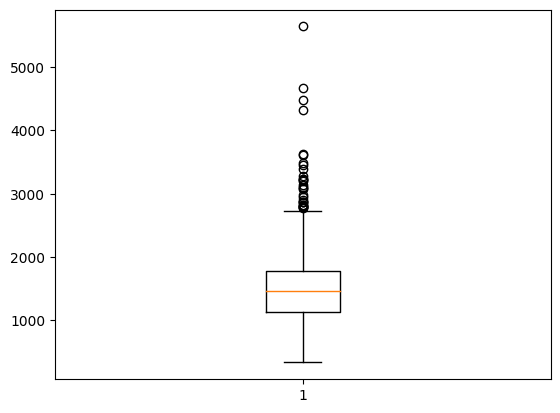

In [13]:
fig, ax = plt.subplots()
ax.boxplot(num_df['GrLivArea'])

Plot scatter graph of SalePrice versus GarageArea.

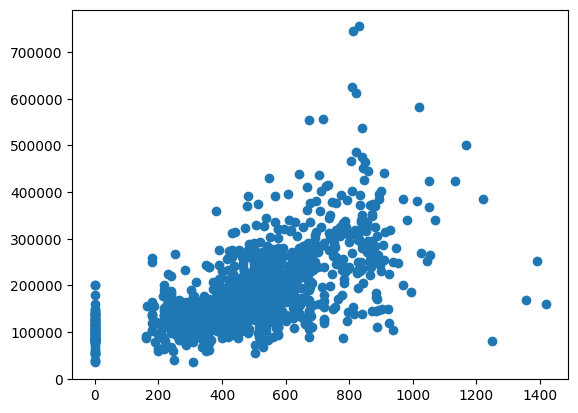

In [14]:
fig, ax = plt.subplots()

ax.scatter(num_df['GarageArea'], num_df['SalePrice'])

You will see that some data points are located at zero via x axis. Let's differentiate them with colors. Divide the dataframe according to whether or not GarageArea is zero by using loc. You will have two individual subdataframes. Use columns of GarageArea and SalePrice of subdataframes to make a scatter plot as shown in the Picture. 

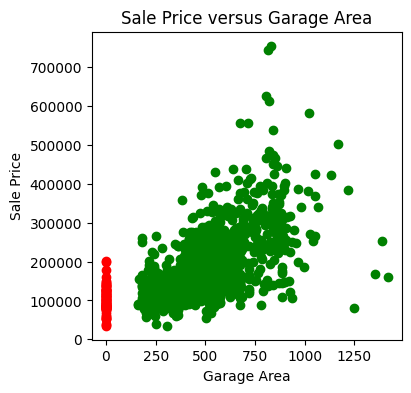

You can use the following code to split the column data into two parts

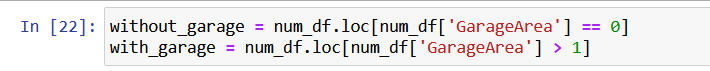

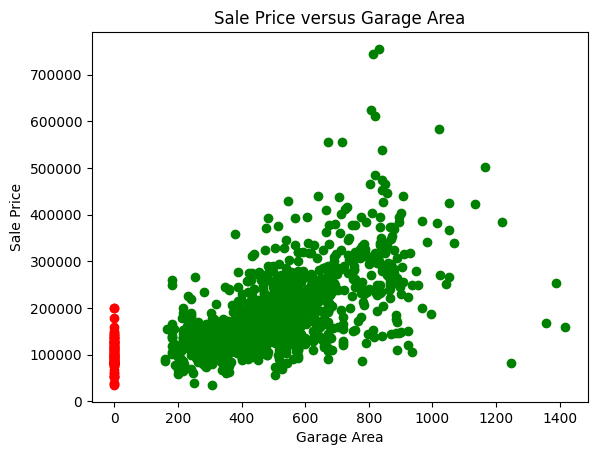

In [15]:
fig, ax = plt.subplots()
without_garage = num_df.loc[num_df['GarageArea'] == 0]
with_garage = num_df.loc[num_df['GarageArea'] > 1]

ax.set_xlabel('Garage Area')
ax.set_ylabel('Sale Price')
ax.set_title('Sale Price versus Garage Area')

ax.scatter(with_garage['GarageArea'], with_garage['SalePrice'], color = 'green')
ax.scatter(without_garage['GarageArea'], without_garage['SalePrice'], color = 'red')
plt.savefig('figure.png')

Well done! Question: Can we apply KNN Classifier to this dataset by taking SalePrice as target column? Don't import KNN to check. Just answer the question.

In [16]:
## We can't apply any classifier method since the target column of dataset has continuous values. 
## Regression method is a more optimal choice

<h6>You can skip the rest for this tutorial but for your interest, you can take a look at them at home</h6>

Apply the following code. The aim is to create a new column as a feature containing only 0 and 1 values indicating whether or not Garage exists

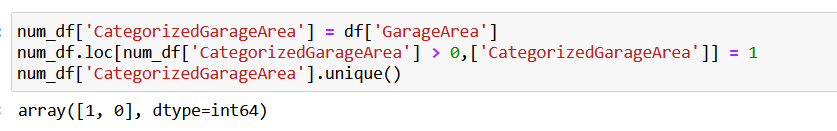

In [17]:
num_df['CategorizedGarageArea'] = df['GarageArea']
num_df.loc[num_df['CategorizedGarageArea'] > 0,['CategorizedGarageArea']] = 1
num_df['CategorizedGarageArea'].unique()

array([1, 0], dtype=int64)

Get correlations once again and see how the new feature affects SalePrice. Put your comments

In [18]:
num_df.corr()['SalePrice'].sort_values(ascending = False)

SalePrice                1.000000
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
FullBath                 0.560664
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
YearRemodAdd             0.507101
GarageYrBlt              0.486362
MasVnrArea               0.477493
Fireplaces               0.466929
BsmtFinSF1               0.386420
LotFrontage              0.351799
WoodDeckSF               0.324413
2ndFlrSF                 0.319334
OpenPorchSF              0.315856
HalfBath                 0.284108
LotArea                  0.263843
CategorizedGarageArea    0.236832
BsmtFullBath             0.227122
BsmtUnfSF                0.214479
BedroomAbvGr             0.168213
ScreenPorch              0.111447
PoolArea                 0.092404
MoSold                   0.046432
3SsnPorch                0.044584
BsmtFinSF2    